In [3]:
import pandas as pd
import numpy as npnearRegression
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/sujan/Desktop/Resource/Resource/ARIMA/dataset_phi.csv")

In [5]:
df.dtypes

Unnamed: 0      int64
Y             float64
dtype: object

In [6]:
df

,Unnamed: 0,Y
0,1,3.117676
1,2,5.808251
2,3,4.906769
3,4,6.119474
4,5,8.135326
5,6,9.344867
6,7,9.147651
7,8,8.101493
8,9,10.146419
9,10,11.045196


In [7]:
df['Y_rolling_mean']=df['Y'].rolling(10).mean()
df['Y_rolling_mean'].iloc[0:9]=0.0


C:\Users\sujan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df['Detrended_series']=df['Y_rolling_mean']-df['Y']

In [9]:
del df['Detrended_series']

In [10]:
df['Detrended_series']=df['Y']-df['Y_rolling_mean']

#### Time series Decomposition plot:

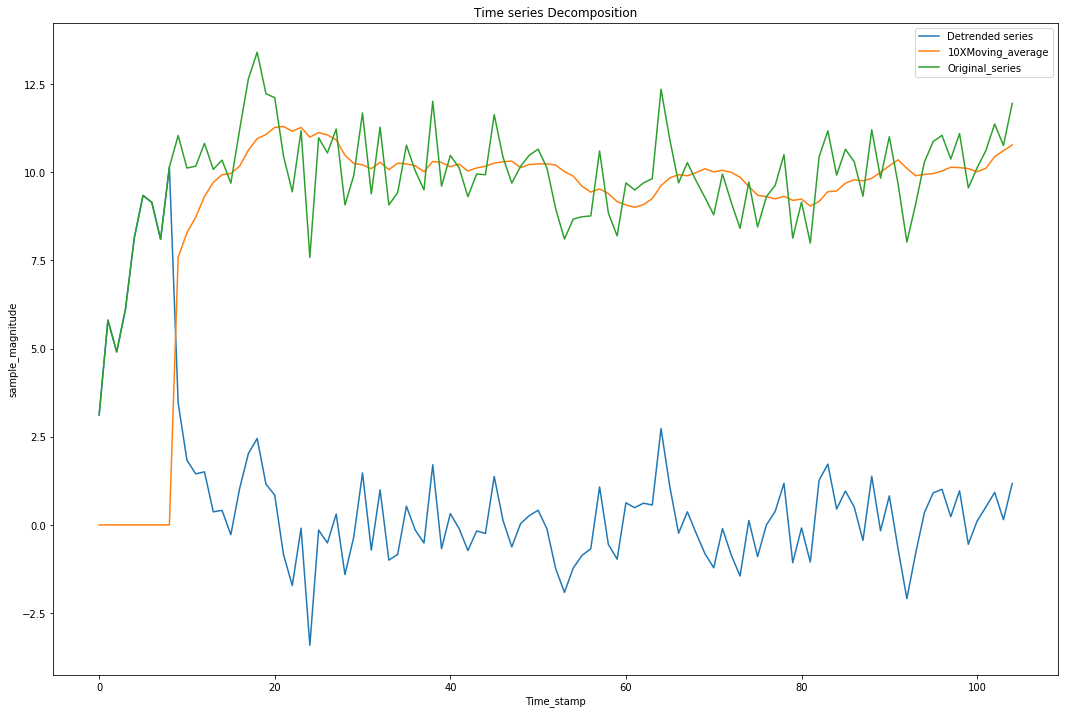

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax=df['Detrended_series'].plot(label="Detrended series")
df['Y_rolling_mean'].plot(label='10XMoving_average',ax=ax)
df['Y'].plot(label='Original_series',ax=ax)
plt.legend()
plt.xlabel("Time_stamp")
plt.ylabel("sample_magnitude")
plt.title("Time series Decomposition")
plt.show()

##### Detrended Series statistics:

In [12]:
print("Mean of detrended series is : {}".format(df['Detrended_series'].mean()))
print("Variance of the detrended series is :{} ".format(np.var(df['Detrended_series'])))

Mean of detrended series is : 0.7317939679523808
Variance of the detrended series is :5.412885032466187 


#### Original series statistics: 

In [13]:
print("mean of the original series :  {}".format(df['Y'].mean()))
print("Variance of the original series is :  {} ".format(np.var(df['Y'])))

mean of the original series :  9.855196807761905
Variance of the original series is :  2.1796163204587735 


##### Trend series statistics:

In [14]:
print("mean of the Trend series :  {}".format(df['Y_rolling_mean'].mean()))
print("Variance of Trend series : {}".format(np.var(df['Y_rolling_mean'])))

mean of the Trend series :  9.123402839809524
Variance of Trend series : 8.161816335583868


### Moving average : window size

The moving average window size is choosen as 10 since 10 rows get generated per hour.This window size varies according to the periodicity changes.

### Conclusion:


A series is made stationary by detrending the series. Detrend refers to subtracting the trend component with original series.This method gives a strong confidence in saying the series is stationary.Hence ARMA can be applied directly instead of ARIMA and hence neglecting the adf test for stationarity.

## Part- 2
### Computing the Seasonal part from Detrended series:

In [15]:
value=[np.round(x,2) for x in df['Detrended_series']]

In [16]:
len(value)

105

Index(['Unnamed: 0', 'Y', 'Y_rolling_mean', 'Detrended_series'], dtype='object')


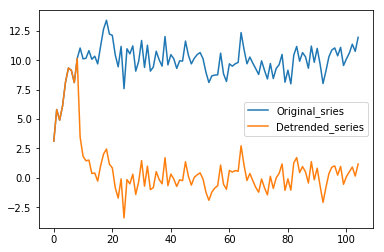

In [17]:
df['Detrended_series']=value
print(df.columns)
df['Y'].plot(label="Original_sries")
df['Detrended_series'].plot(label="Detrended_series")
plt.legend()
plt.show()

In [18]:
def split_data(data):
        i=0
        j=9
       
        mean_subset=data.loc[i:j].mean()
        i=i+10
        j=j+10
    
        print(mean_subset)
    
    

In [19]:
105/10

10.5

In [20]:
data=pd.read_csv("C:/Users/sujan/Desktop/D_Folder/disk_space_Moving_Average.csv")

In [21]:
data['Date/Time']=pd.to_datetime(data['Date/Time'])

In [22]:
data.groupby('Date/Time').first()

,Measure Value
Date/Time,
2018-12-25 00:59:00,81.61
2018-12-25 01:08:00,81.61
2018-12-25 01:17:00,81.62
2018-12-25 01:27:00,81.61
2018-12-25 01:37:00,81.61
2018-12-25 01:48:00,81.61
2018-12-25 01:58:00,81.61
2018-12-25 02:09:00,81.61
2018-12-25 02:20:00,81.61


In [23]:
data.set_index("Date/Time",inplace=True)

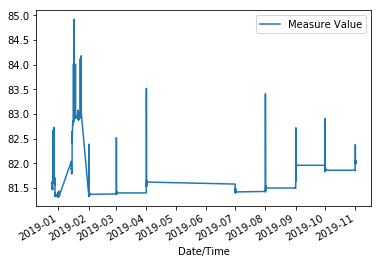

In [24]:
data.plot()

In [25]:
data['2019-01'].mean()

Measure Value    82.639963
dtype: float64

In [26]:
data['Percentage_change']=data['Measure Value'].pct_change(10)

In [27]:
data['Percentage_change'][0:10]=0.00

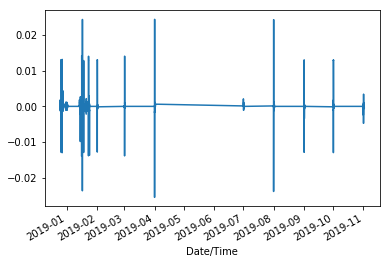

In [28]:
data['Percentage_change'].plot()

In [29]:
df

,Unnamed: 0,Y,Y_rolling_mean,Detrended_series
0,1,3.117676,0.000000,3.12
1,2,5.808251,0.000000,5.81
2,3,4.906769,0.000000,4.91
3,4,6.119474,0.000000,6.12
4,5,8.135326,0.000000,8.14
5,6,9.344867,0.000000,9.34
6,7,9.147651,0.000000,9.15
7,8,8.101493,0.000000,8.10
8,9,10.146419,0.000000,10.15
9,10,11.045196,7.587312,3.46


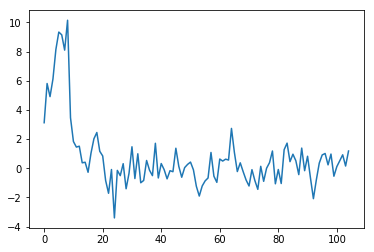

In [31]:
df['Detrended_series'].plot()